In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [3]:
df = pd.read_csv('D:\portfolio\cryptocurrency_price_prediction\data\processed\preprocessed_crypto_data.csv')  # Change file name

In [4]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)
display(df.head())

Shape: (998, 15)

Columns: ['date', 'coin', 'symbol', 'price', '1h', '24h', '7d', '24h_volume', 'mkt_cap', 'year', 'month', 'day_of_week', 'day_of_year', 'week_of_year', 'quarter']

Missing values:
 date            0
coin            0
symbol          0
price           0
1h              0
24h             0
7d              0
24h_volume      0
mkt_cap         0
year            0
month           0
day_of_week     0
day_of_year     0
week_of_year    0
quarter         0
dtype: int64

Data types:
 date             object
coin             object
symbol           object
price           float64
1h              float64
24h             float64
7d              float64
24h_volume      float64
mkt_cap         float64
year              int64
month             int64
day_of_week       int64
day_of_year       int64
week_of_year      int64
quarter           int64
dtype: object


,date,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,year,month,day_of_week,day_of_year,week_of_year,quarter
0,2022-03-16,Bitcoin,BTC,4.085946e+04,0.908636,0.552739,0.118660,6.108705e-01,0.993446,2022,3,2,75,11,1
1,2022-03-16,Iron Bank EURO,IBEUR,1.080000e+00,0.881101,0.524939,0.109756,1.644225e-06,0.000083,2022,3,2,75,11,1
2,2022-03-16,Prometeus,PROM,7.960000e+00,0.902378,0.534751,0.110918,1.845794e-05,0.000083,2022,3,2,75,11,1
3,2022-03-16,MaidSafeCoin,MAID,2.949200e-01,0.909887,0.536386,0.116725,5.250232e-08,0.000086,2022,3,2,75,11,1
4,2022-03-16,Bezoge Earth,BEZOGE,3.051000e-09,0.896120,0.524121,0.100077,3.269217e-06,0.000087,2022,3,2,75,11,1


In [5]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

In [6]:
display(df.describe())

,date,price,1h,24h,7d,24h_volume,mkt_cap,year,month,day_of_week,day_of_year,week_of_year,quarter
count,998,9.980000e+02,998.000000,998.000000,998.000000,998.000000,998.000000,998.0,998.0,998.000000,998.000000,998.0,998.0
mean,2022-03-16 11:58:33.426853632,6.573443e+02,0.893262,0.547509,0.112522,0.004971,0.004764,2022.0,3.0,2.498998,75.498998,11.0,1.0
min,2022-03-16 00:00:00,1.484000e-09,0.000000,0.000000,0.000000,0.000000,0.000000,2022.0,3.0,2.000000,75.000000,11.0,1.0
25%,2022-03-16 00:00:00,1.933102e-01,0.882353,0.529027,0.100077,0.000030,0.000064,2022.0,3.0,2.000000,75.000000,11.0,1.0
50%,2022-03-16 00:00:00,1.095000e+00,0.888611,0.540474,0.107820,0.000144,0.000189,2022.0,3.0,2.000000,75.000000,11.0,1.0
75%,2022-03-17 00:00:00,7.210000e+00,0.904881,0.556827,0.114983,0.000688,0.000682,2022.0,3.0,3.000000,76.000000,11.0,1.0
max,2022-03-17 00:00:00,4.121727e+04,1.000000,1.000000,1.000000,1.000000,1.000000,2022.0,3.0,3.000000,76.000000,11.0,1.0
std,NaN,4.589167e+03,0.033638,0.048395,0.044353,0.047692,0.049066,0.0,0.0,0.500250,0.500250,0.0,0.0


C:\Users\praba\AppData\Local\Temp\ipykernel_7920\3242061455.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


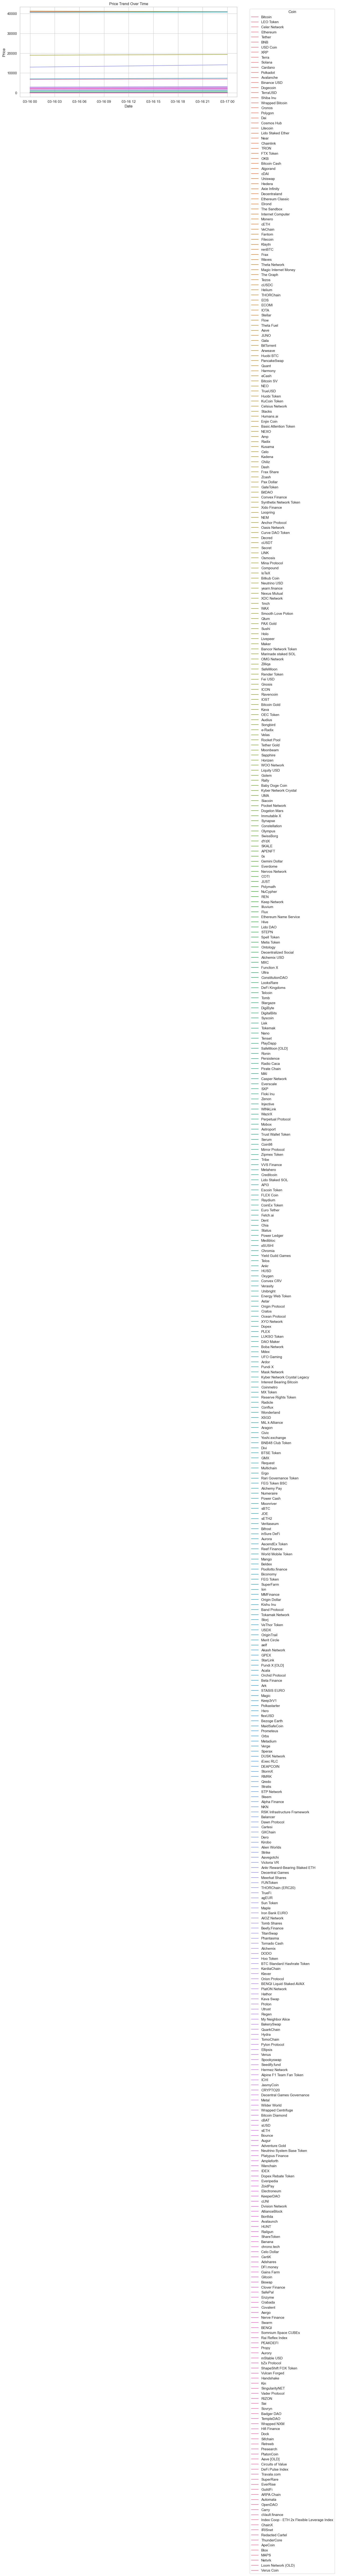

In [7]:
# ===============================
#Visualize Target Column (`price`)
# ===============================
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='date', y='price', hue='coin')
plt.title('Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(title='Coin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

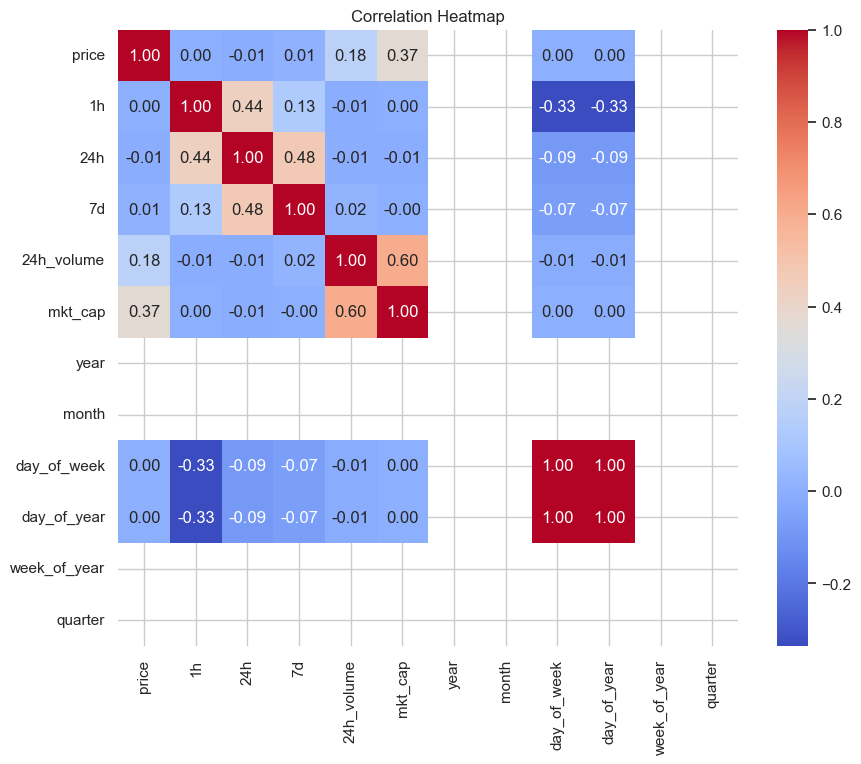

In [8]:
# Correlation Matrix
# ===============================
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

C:\Users\praba\AppData\Local\Temp\ipykernel_7920\2512819722.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='viridis', y=None)


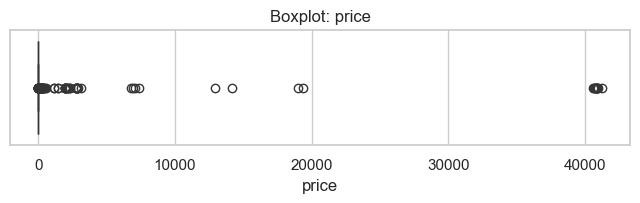

C:\Users\praba\AppData\Local\Temp\ipykernel_7920\2512819722.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='viridis', y=None)


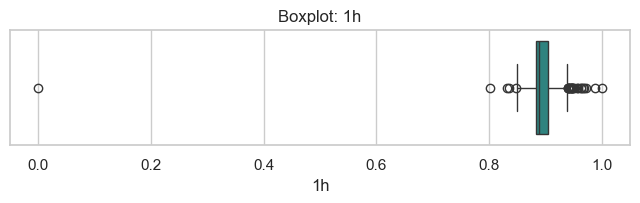

C:\Users\praba\AppData\Local\Temp\ipykernel_7920\2512819722.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='viridis', y=None)


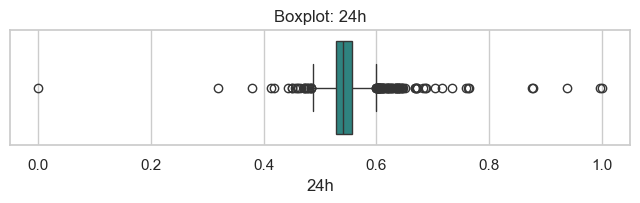

C:\Users\praba\AppData\Local\Temp\ipykernel_7920\2512819722.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='viridis', y=None)


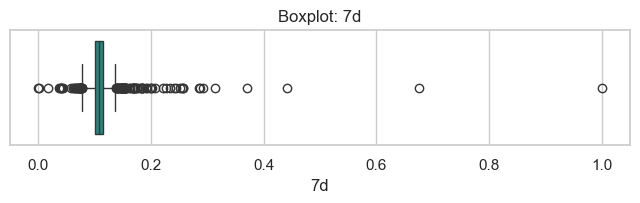

C:\Users\praba\AppData\Local\Temp\ipykernel_7920\2512819722.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='viridis', y=None)


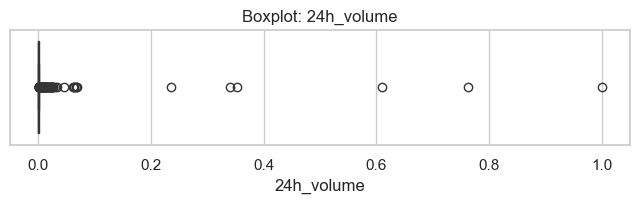

C:\Users\praba\AppData\Local\Temp\ipykernel_7920\2512819722.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='viridis', y=None)


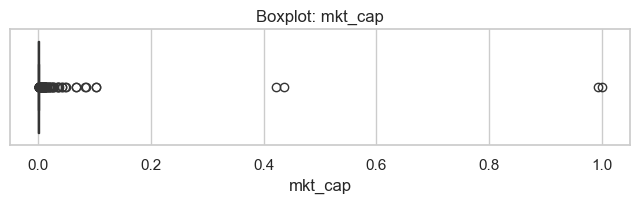

In [9]:
# ===============================
# Boxplots for Outlier Detection
# ===============================
numerical_cols = ['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap']
for col in numerical_cols:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=df[col], palette='viridis', y=None)
    plt.title(f'Boxplot: {col}')
    plt.show()

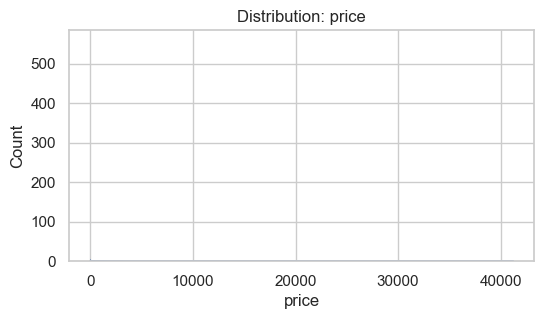

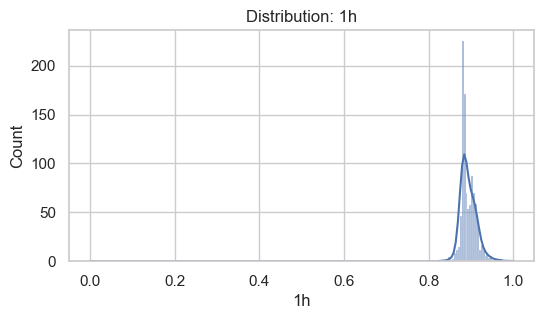

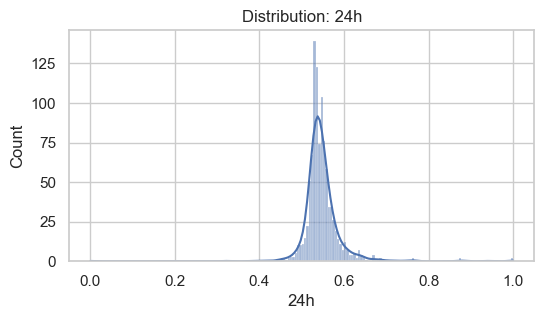

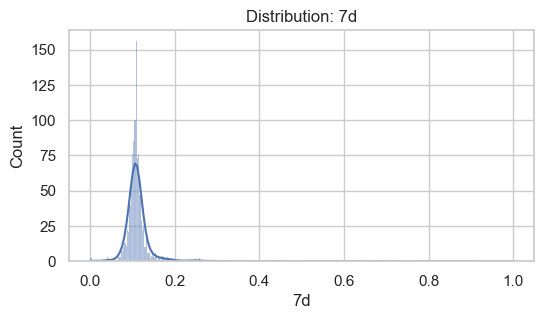

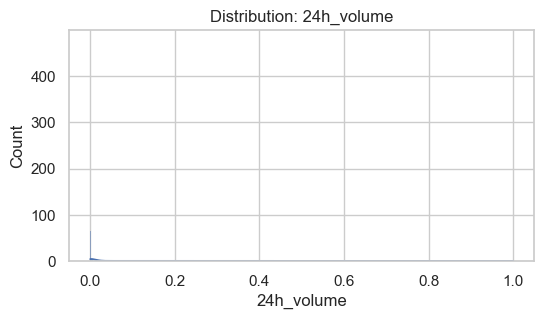

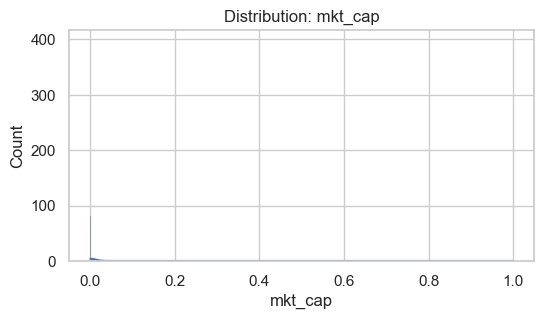

In [10]:
#Distribution Plots
# ===============================
for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution: {col}')
    plt.show()


In [11]:
# Group by Coin — Summary Stats
# ===============================
coin_summary = df.groupby('coin')[['price', '24h_volume', 'mkt_cap']].mean().sort_values('price', ascending=False)
display(coin_summary)

,price,24h_volume,mkt_cap
coin,,,
Huobi BTC,4.106317e+04,0.000021,0.002022
Bitcoin,4.085542e+04,0.482152,0.996723
Wrapped Bitcoin,4.081806e+04,0.006042,0.014231
Interest Bearing Bitcoin,4.075089e+04,0.000709,0.000158
renBTC,4.070493e+04,0.000217,0.000699
...,...,...,...
FEG Token BSC,3.938500e-09,0.000007,0.000128
FEG Token,3.710000e-09,0.000015,0.000111
Bezoge Earth,3.017500e-09,0.000003,0.000085


In [12]:
# Seasonal Decomposition (Optional)
# ===============================
# Prepare for single coin
df.set_index('date', inplace=True)
coin_name = 'Bitcoin'  # You can change this
coin_df = df[df['coin'] == coin_name].copy()

In [13]:
# Resample to daily
coin_df_daily = coin_df['price'].resample('D').mean().interpolate()

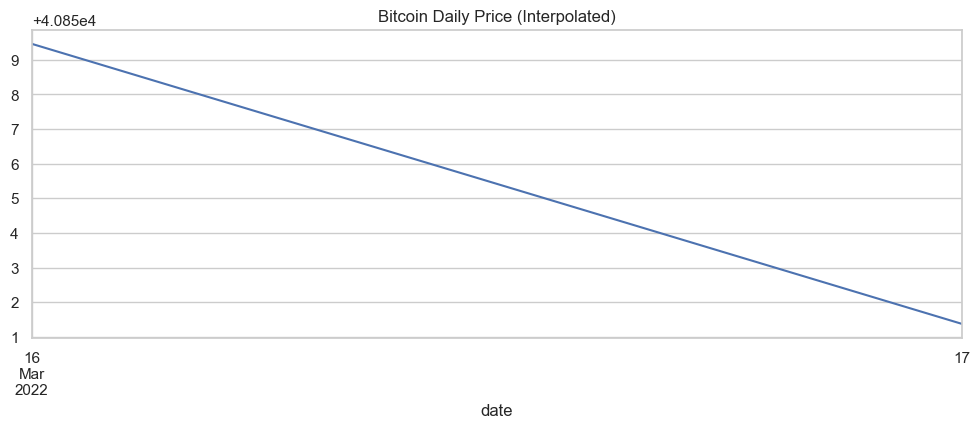

In [14]:
# Plot interpolated trend
coin_df_daily.plot(title=f"{coin_name} Daily Price (Interpolated)", figsize=(12, 4))
plt.show()


In [16]:

# Reset index for future steps
df.reset_index(inplace=True)


In [17]:
# STEP 12: Save Cleaned Data (Optional)
# ===============================
df.to_csv('D:\portfolio\cryptocurrency_price_prediction\data\processed\cleaned_crypto_price.csv', index=False)
print("✅ Cleaned data saved.")

✅ Cleaned data saved.
